In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
# Import packages
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load data
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [12]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

According to the chart above, we can see that we have all numerical data and no null values to address.

# Data Preparation

# EDA Process

In [13]:
# check null values
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [14]:
#checking wins vs loss 
print("Percent of games that are a win:",df['blueWins'].mean())

Percent of games that are a win: 0.4990383642069035


In [15]:
#looking at mean, median mode std for values 
df.mean()

gameId                          4.500084e+09
blueWins                        4.990384e-01
blueWardsPlaced                 2.228829e+01
blueWardsDestroyed              2.824881e+00
blueFirstBlood                  5.048082e-01
blueKills                       6.183925e+00
blueDeaths                      6.137666e+00
blueAssists                     6.645106e+00
blueEliteMonsters               5.499544e-01
blueDragons                     3.619800e-01
blueHeralds                     1.879745e-01
blueTowersDestroyed             5.142221e-02
blueTotalGold                   1.650346e+04
blueAvgLevel                    6.916004e+00
blueTotalExperience             1.792811e+04
blueTotalMinionsKilled          2.166996e+02
blueTotalJungleMinionsKilled    5.050967e+01
blueGoldDiff                    1.441411e+01
blueExperienceDiff             -3.362031e+01
blueCSPerMin                    2.166996e+01
blueGoldPerMin                  1.650346e+03
redWardsPlaced                  2.236795e+01
redWardsDe

In [16]:
df.median()

gameId                          4.510920e+09
blueWins                        0.000000e+00
blueWardsPlaced                 1.600000e+01
blueWardsDestroyed              3.000000e+00
blueFirstBlood                  1.000000e+00
blueKills                       6.000000e+00
blueDeaths                      6.000000e+00
blueAssists                     6.000000e+00
blueEliteMonsters               0.000000e+00
blueDragons                     0.000000e+00
blueHeralds                     0.000000e+00
blueTowersDestroyed             0.000000e+00
blueTotalGold                   1.639800e+04
blueAvgLevel                    7.000000e+00
blueTotalExperience             1.795100e+04
blueTotalMinionsKilled          2.180000e+02
blueTotalJungleMinionsKilled    5.000000e+01
blueGoldDiff                    1.400000e+01
blueExperienceDiff             -2.800000e+01
blueCSPerMin                    2.180000e+01
blueGoldPerMin                  1.639800e+03
redWardsPlaced                  1.600000e+01
redWardsDe

In [17]:
df.mode(axis=0).iloc[:1]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4295358071,0.0,16.0,2.0,1.0,6.0,5.0,5.0,0.0,0.0,...,0.0,16074.0,7.0,17842.0,215.0,52.0,-428.0,-63.0,21.5,1607.4


In [18]:
df.std()

gameId                          2.757328e+07
blueWins                        5.000244e-01
blueWardsPlaced                 1.801918e+01
blueWardsDestroyed              2.174998e+00
blueFirstBlood                  5.000022e-01
blueKills                       3.011028e+00
blueDeaths                      2.933818e+00
blueAssists                     4.064520e+00
blueEliteMonsters               6.255265e-01
blueDragons                     4.805974e-01
blueHeralds                     3.907116e-01
blueTowersDestroyed             2.443692e-01
blueTotalGold                   1.535447e+03
blueAvgLevel                    3.051458e-01
blueTotalExperience             1.200524e+03
blueTotalMinionsKilled          2.185844e+01
blueTotalJungleMinionsKilled    9.898282e+00
blueGoldDiff                    2.453349e+03
blueExperienceDiff              1.920370e+03
blueCSPerMin                    2.185844e+00
blueGoldPerMin                  1.535447e+02
redWardsPlaced                  1.845743e+01
redWardsDe

In [19]:
# number of samples
len(df)

9879

There is an adequate number of samples. Furthermore, the wins and losses are almost 50 - 50 so we don't need to wory about class imbalance.

In [20]:
#making a heat map
corr = df.corr()

In [21]:
plt.figure(figsize = (100,80))
corr.style.background_gradient(cmap ='coolwarm')

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

<Figure size 7200x5760 with 0 Axes>

<AxesSubplot:>

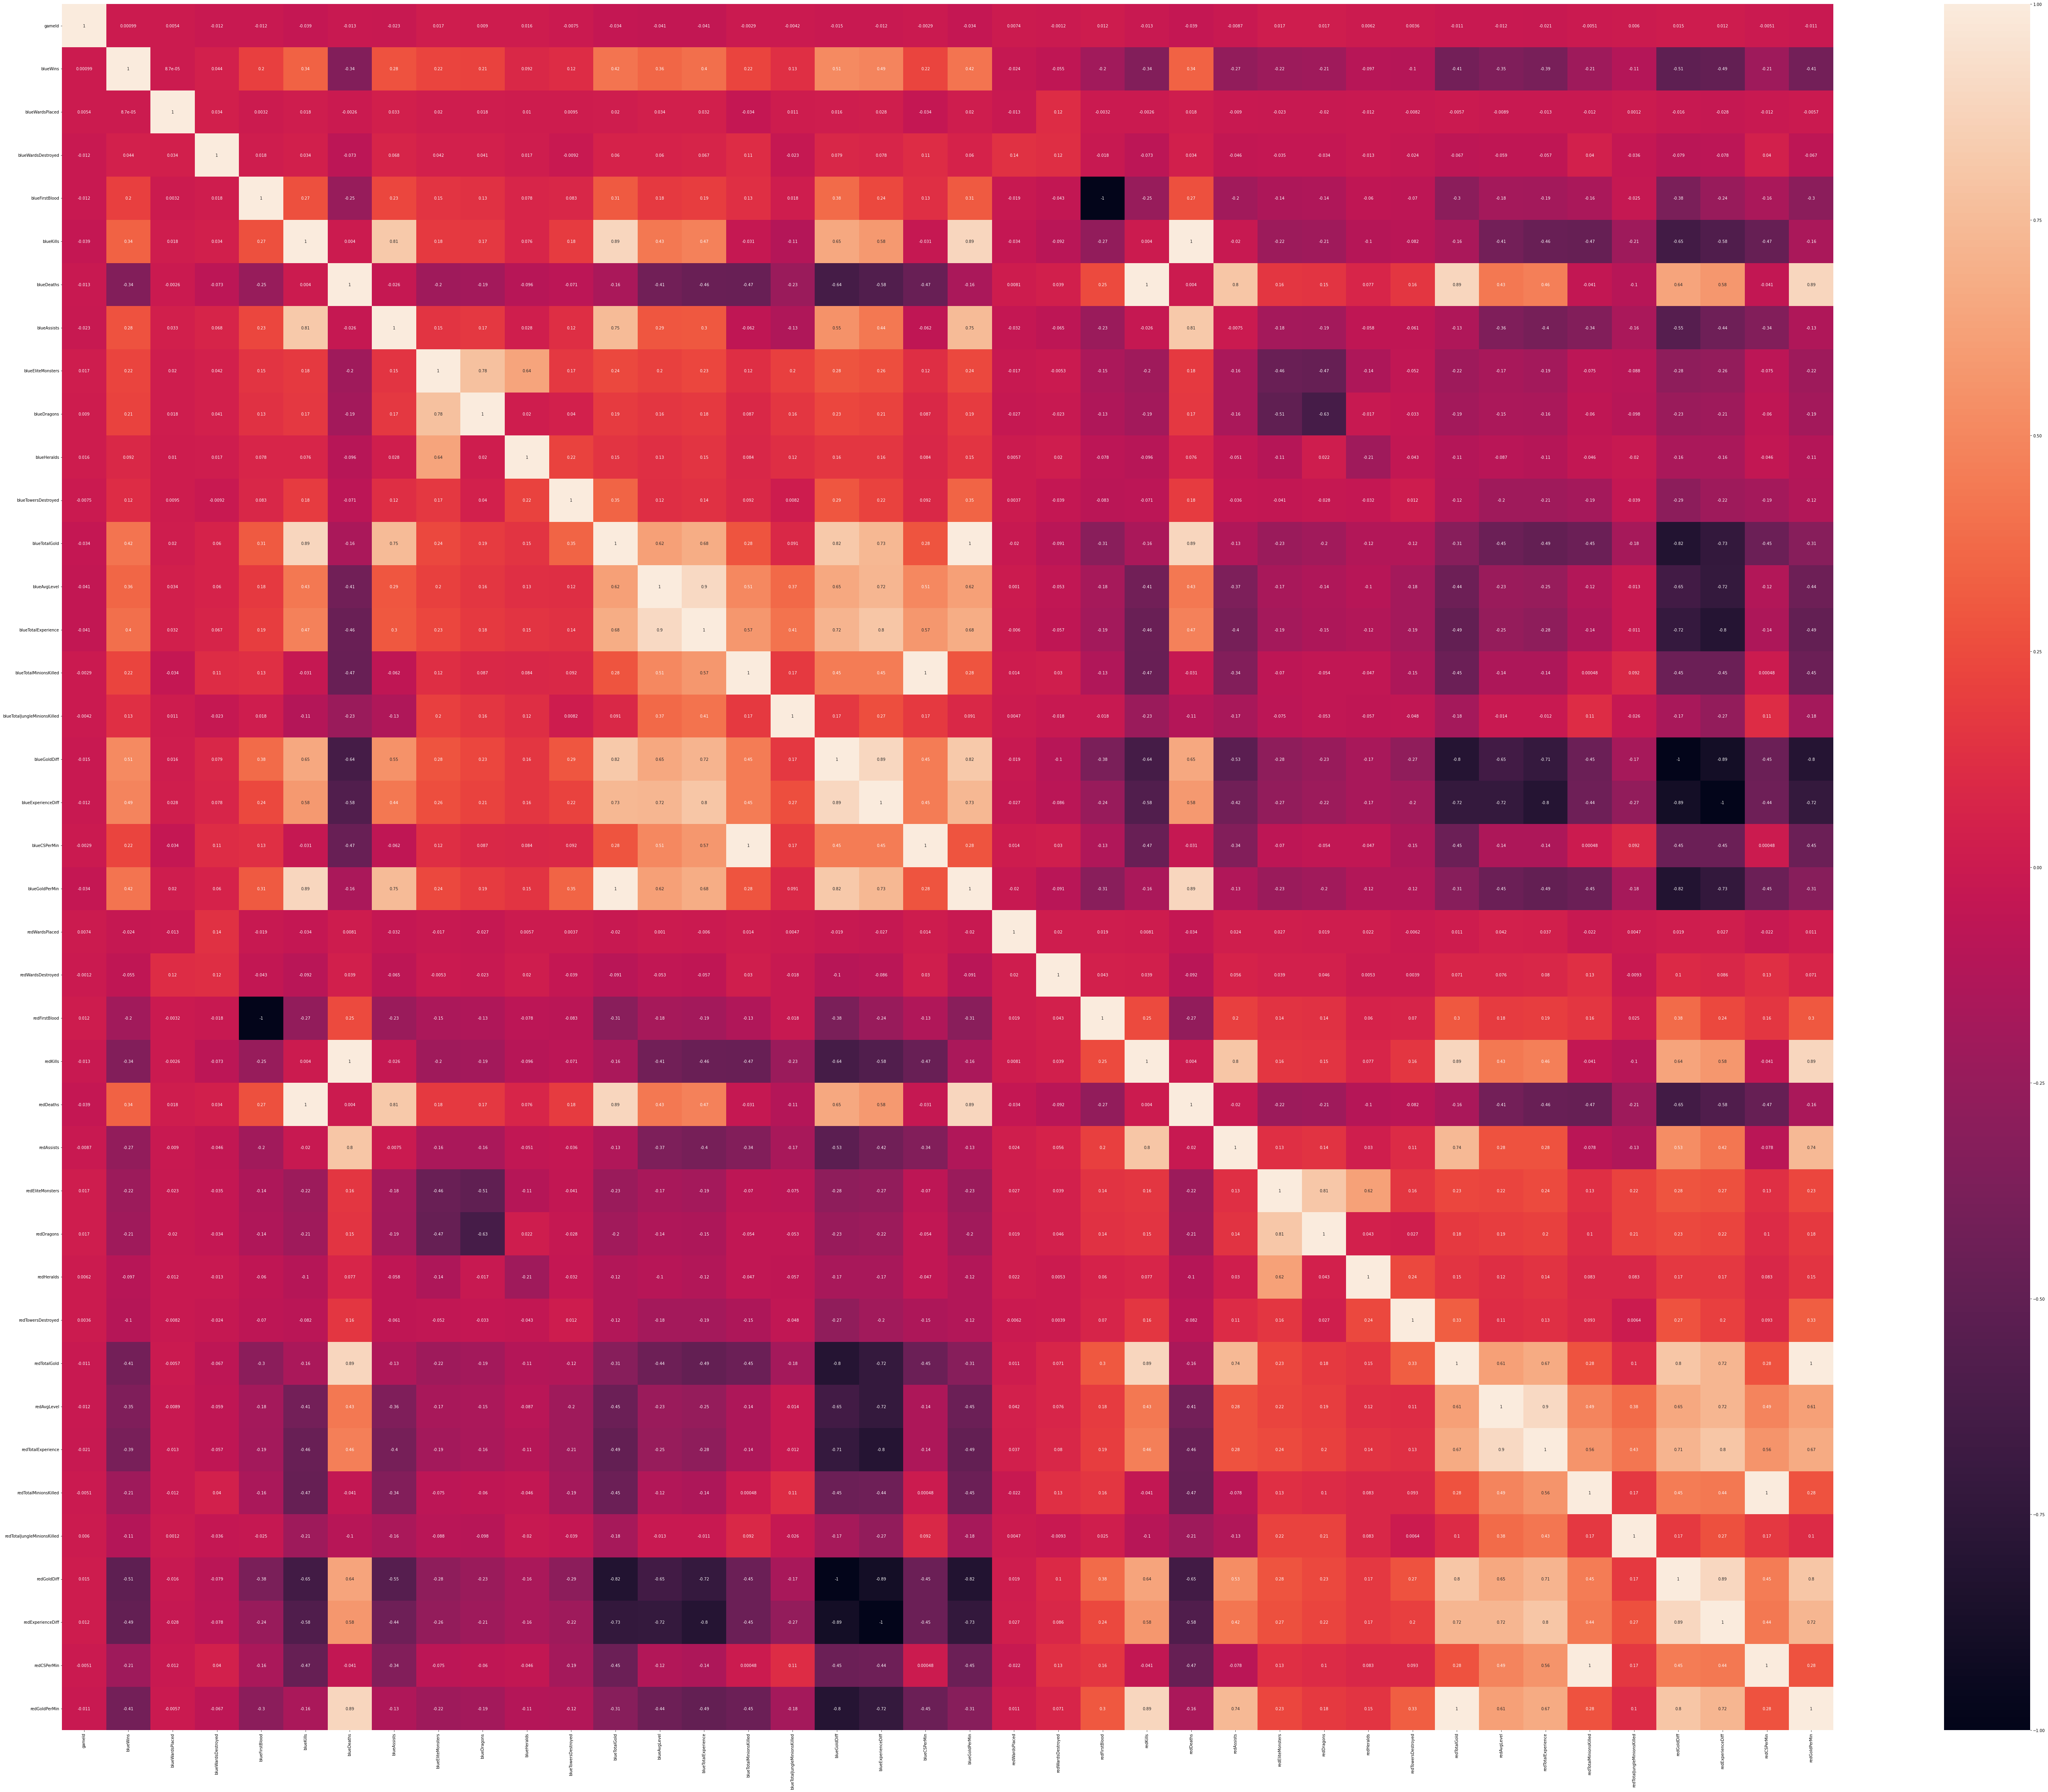

In [22]:
#second heat map same data but different color and style
plt.figure(figsize = (100,80))
sn.heatmap(corr, annot = True)

In [23]:
# correlation with blueWins
corr['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

In [24]:
# observe the average for each feature based on winning team 
df_blue_won = df[df['blueWins'] == 1]
df_red_won = df[df['blueWins'] == 0]

In [25]:
# difference between averages for when blue wins vs any game in general
df_blue_won.mean() - df.mean()

gameId                          27214.119987
blueWins                            0.500962
blueWardsPlaced                     0.001570
blueWardsDestroyed                  0.096417
blueFirstBlood                      0.101074
blueKills                           1.017697
blueDeaths                         -0.997301
blueAssists                         1.126699
blueEliteMonsters                   0.139092
blueDragons                         0.102929
blueHeralds                         0.036163
blueTowersDestroyed                 0.028294
blueTotalGold                     641.808383
blueAvgLevel                        0.109392
blueTotalExperience               476.467758
blueTotalMinionsKilled              4.925385
blueTotalJungleMinionsKilled        1.303518
blueGoldDiff                     1256.303942
blueExperienceDiff                941.894748
blueCSPerMin                        0.492538
blueGoldPerMin                     64.180838
redWardsPlaced                     -0.437729
redWardsDe

In [26]:
# difference between averages for when red wins vs any game in general
df_red_won.mean() - df.mean()

gameId                         -27109.640640
blueWins                           -0.499038
blueWardsPlaced                    -0.001564
blueWardsDestroyed                 -0.096047
blueFirstBlood                     -0.100686
blueKills                          -1.013790
blueDeaths                          0.993472
blueAssists                        -1.122374
blueEliteMonsters                  -0.138558
blueDragons                        -0.102534
blueHeralds                        -0.036025
blueTowersDestroyed                -0.028185
blueTotalGold                    -639.344378
blueAvgLevel                       -0.108972
blueTotalExperience              -474.638522
blueTotalMinionsKilled             -4.906475
blueTotalJungleMinionsKilled       -1.298513
blueGoldDiff                    -1251.480791
blueExperienceDiff               -938.278664
blueCSPerMin                       -0.490648
blueGoldPerMin                    -63.934438
redWardsPlaced                      0.436049
redWardsDe

<AxesSubplot:title={'center':'Blue Won'}>

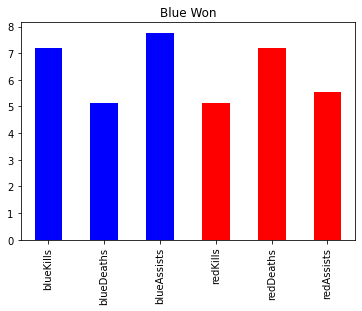

In [27]:
#blue won
plt.title("Blue Won")
df_blue_won[['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']].mean().plot(kind='bar',color=['b','b','b','r','r','r'])

<AxesSubplot:title={'center':'Red Won'}>

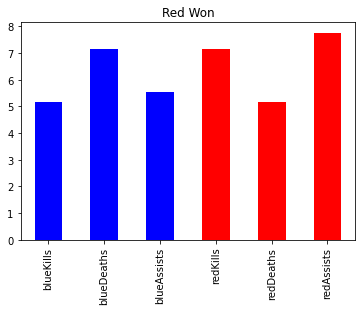

In [28]:
#red won
plt.title("Red Won")

df_red_won[['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']].mean().plot(kind='bar',color=['b','b','b','r','r','r'])

<AxesSubplot:title={'center':'Blue Won'}>

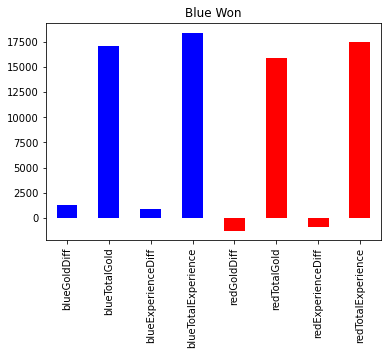

In [29]:
#blue won
plt.title("Blue Won")
df_blue_won[['blueGoldDiff','blueTotalGold','blueExperienceDiff','blueTotalExperience','redGoldDiff','redTotalGold','redExperienceDiff','redTotalExperience']].mean().plot(kind='bar',color=['b','b','b','b','r','r','r','r'])

<AxesSubplot:title={'center':'Red Won'}>

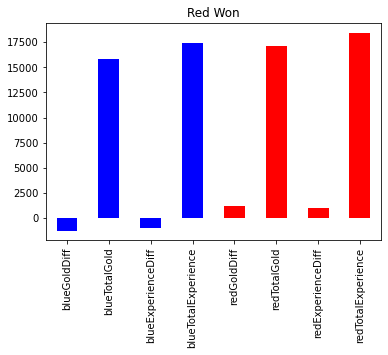

In [30]:
#red won
plt.title("Red Won")
df_red_won[['blueGoldDiff','blueTotalGold','blueExperienceDiff','blueTotalExperience','redGoldDiff','redTotalGold','redExperienceDiff','redTotalExperience']].mean().plot(kind='bar',color=['b','b','b','b','r','r','r','r'])

In [31]:
df['blueDragons'].max()

1

In [32]:
# Drop gameId column (this is an identifier for each match -- not useful for our model)
df.drop('gameId', axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [33]:
# Create df with our selected features
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redDragons', 
                'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,1,6,6,7,1,0,0,225,67


In [34]:
# Drop the features that are duplicates of each other
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

# Logistic Regression

In [35]:
# Test train split

X = df_select.drop('blueWins', axis=1)
y = df_select['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
# Train and test a simple logistical regression model to get a baseline 
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1624
           1       0.73      0.72      0.73      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



# GridSearch CV - Logistic Regression

In [37]:
# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False],'penalty': ['l1', 'l2'], 
              'max_iter': [500], 'solver': ['liblinear']}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [38]:
# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.01, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.7221228874228443


In [39]:
print("Test score: ", grid_search.score(X_test, y_test))

Test score:  0.7160380251456608


In [40]:
log_reg = LogisticRegression(C=0.01,fit_intercept=True,max_iter=500,penalty='l1',solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1624
           1       0.72      0.71      0.72      1637

    accuracy                           0.72      3261
   macro avg       0.72      0.72      0.72      3261
weighted avg       0.72      0.72      0.72      3261



# XGBoost: Random Forest

In [41]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report 
    
    print("Classification Report")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [42]:
# Fit and evaluate XGBoost 
xgb_select = fit_eval(XGBRFClassifier(random_state=42), \
                      X_train, y_train, \
                      X_test, y_test)

Classification Report
              precision    recall  f1-score   support

           0     0.7130    0.7050    0.7090      1624
           1     0.7106    0.7184    0.7145      1637

    accuracy                         0.7117      3261
   macro avg     0.7118    0.7117    0.7117      3261
weighted avg     0.7118    0.7117    0.7117      3261



# GridSearch CV - XGBoost: Random Forest

In [43]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
xgb_grid = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Print best params for xgb_grid
xgb_grid.best_params_

In [ ]:
# Print best score for xgb_grid
print("Best score: ", xgb_grid.best_score_)

In [ ]:
# Evaluate best estimating model
evaluate_model(xgb_grid.best_estimator_, X_train, y_train, \
               X_test, y_test, params=True)

# XGBoost Random Forest Feature Importance

In [ ]:
# Extract coefficients
xgb_importance = pd.Series(xgb_grid.best_estimator_.feature_importances_,
               index=X_train.columns).sort_values(ascending=False)
xgb_importance

In [ ]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='magma', ax=ax, orient='h')
ax.set_title('XGBoost Feature Importance');

# Naive Bayes

In [45]:
def load_data(filename):
    data = pd.read_csv(filename)
    return data

def train_model(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Accuracy: 70.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1624
           1       0.71      0.70      0.70      1637

    accuracy                           0.71      3261
   macro avg       0.71      0.71      0.71      3261
weighted avg       0.71      0.71      0.71      3261


Confusion Matrix:
[[1164  460]
 [ 499 1138]]
Feature importances:
blueWardsPlaced: 0.00040
blueWardsDestroyed: 0.00012
blueFirstBlood: 0.00074
blueKills: 0.01984
blueDeaths: 0.02202
blueAssists: 0.00791
blueDragons: 0.00662
blueHeralds: 0.00104
blueTowersDestroyed: 0.00997
blueTotalMinionsKilled: 0.01119
blueTotalJungleMinionsKilled: 0.00368
redWardsPlaced: -0.00018
redWardsDestroyed: -0.00092
redAssists: 0.01138
redDragons: 0.00460
redHeralds: 0.00153
redTowersDestroyed: 0.00616
redTotalMinionsKilled: 0.00549
redTotalJungleMinionsKilled: 0.00071


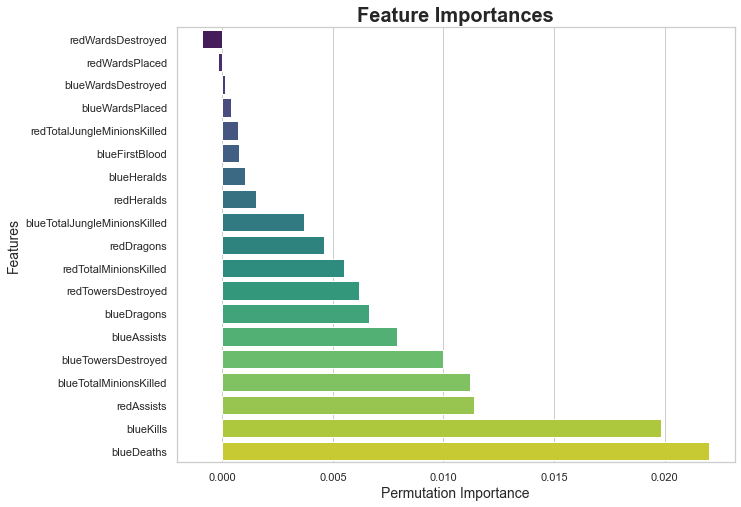

In [48]:
filename = "high_diamond_ranked_10min.csv"
data = load_data(filename)

X = df_select.drop("blueWins", axis=1)  # Features (excluding the target variable)
y = df_select["blueWins"]  # Target variable (game_result)

# Split the dataset into training (67%) and testing (33%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = train_model(X_train, y_train)
evaluate_model(model, X_test, y_test)


# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Print the feature importances
print("Feature importances:")
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {result.importances_mean[i]:.5f}")

# Sort the features based on their importance
sorted_idx = result.importances_mean.argsort()

# Set seaborn style
sns.set(style="whitegrid")

# Set the plot size
plt.figure(figsize=(10, 8))

# Plot the feature importances
ax = sns.barplot(x=result.importances_mean[sorted_idx], y=X.columns[sorted_idx], palette="viridis")

# Set the title and labels
ax.set_title("Feature Importances", fontsize=20, fontweight="bold")
ax.set_xlabel("Permutation Importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Display the plot
plt.show()